In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import math

<class 'pandas.core.frame.DataFrame'>
Index: 1373 entries, 9295 to 10667
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         1373 non-null   object 
 1   Survey Data       1373 non-null   object 
 2   Well-being        1373 non-null   float64
 3   Needs             1373 non-null   float64
 4   Engagement        1373 non-null   float64
 5   Autonomy          1373 non-null   float64
 6   Belonging         1373 non-null   float64
 7   Competence        1373 non-null   float64
 8   Leadership        1373 non-null   float64
 9   Management        1373 non-null   float64
 10  Returns           1373 non-null   float64
 11  Rewards           1373 non-null   float64
 12  Status            1373 non-null   float64
 13  Myself            1373 non-null   int64  
 14  Tasks             1373 non-null   int64  
 15  Free              1373 non-null   int64  
 16  Mastery           1373 non-null   int64  
 

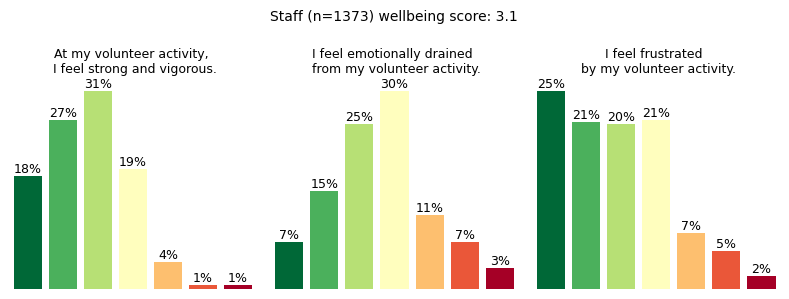

In [3]:
## Provides a bar graph showing the distribution of answers
## to Motiro survey questions grouped by dimensions
## Dimensions: wellbeing, Engagement, Autonomy, Belonging, Competence, Needs, Leadership, Management
## this cell deals with wellbeing only.
## see cells below for the other dimensions

## Enter the NS abbreviated name:
NS='Staff'
# Load the dataset
#file_path = f'{NS}_ALL.csv'
file_path = 'Individual.csv'
df = pd.read_csv(file_path, sep=",", encoding='utf-8')
#df.info()

## select which team, circle, category of respondent, etc. to display
team='Staff'
#team='Volunteer'
## select which variables (grouped in a "dimension") to display
dimension='wellbeing'

# Filter the dataframe for 'Team Name'
#df = df[df['Team Name'] == team]
df = df[df['Position'] == 'Staff']
#df = df[df['Country'] == team]
df.info()

#For circles (groups of teams), further filtering might be required:
#df = df[df['Position'] == 'Volunteer']
#df = df[df['frontline'] == 'Frontline']
#df = df[df['region'] == 'Donetsk Region']

# Count the total number of respondents in filtered dataframe (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

# Define variable sets (dimensions)
wellbeing_vars = ['Strong','Drained','Frustrated']
engagement_vars = ['Meaning', 'Ideas', 'Values', 'Stay', 'Satisfied']
autonomy_vars = ['Myself','Tasks','Free']
belonging_vars = ['Group','Talk','Care'] #add: ,'Friendly','Team'?
competence_vars = ['Mastery','Competent']
needs_vars = ['Autonomy', 'Belonging', 'Competence']
leadership_vars = ['Listens', 'Understands', 'Encourages']
management_vars = ['Network', 'Learn','Responsibilities', 'Work','Appreciated','Impact']

dimension_vars = eval(f'{dimension}_vars')


# Create a dictionary with the frequency of each answer for 'Strong', 'Frustrated' and 'Drained'
freq_dict7 = {'1': ['Never'], '2': [], '3': [], '4': [], '5': [], '6': [], '7': ['Every time']}
#freq_dict7rev = {'1': ['Every time'], '2': [], '3': [], '4': [], '5': [], '6': [], '7': ['Never']}

#for var in dimension_vars:
#    if var == 'Strong':
#        df[var] = df[var].replace(freq_dict7rev)
#        freq_dict7[var] = [0] * 7
#    else:
#        df[var] = df[var].replace(freq_dict7)
#        freq_dict7[var] = [0] * 7


# Compute team's scores for selected dimension
#mean_df = df.groupby('Team Name')[dimension_vars].mean().reset_index()
#wellbeing_score_df = df.groupby(team)['Well-being'].mean().reset_index()
wellbeing_score_df = df.groupby('Country')['Well-being'].mean().reset_index()
wellbeing_score = wellbeing_score_df['Well-being'].values.round(1)[0]

      
# Count the frequency of each answer for each survey question
for var in dimension_vars:
    freq_dict = df[var].value_counts().sort_index()
    freq_dict7[var] = freq_dict.tolist() + [0]*(7-len(freq_dict))
    freq_dict7[var] = freq_dict7[var][:7]


#create a dictionary so that the title of each plot is not the indicator but the survey question
title_dict = {'Strong': 'At my volunteer activity, \n I feel strong and vigorous.',
              'Drained': 'I feel emotionally drained \n from my volunteer activity.',
              'Frustrated': 'I feel frustrated \n by my volunteer activity.'              
             }

# apply dictionary to replace answer in the title for the dimension
title_dict = {k: title_dict[k] for k in dimension_vars}

# Plot frequency bar charts
fig, axes = plt.subplots(math.ceil(len(dimension_vars)/3), 3, figsize=(8, 3))
plt.suptitle(f'{team} (n={n}) {dimension} score: {wellbeing_score}', fontsize=10)

# Remove all frames, axes, ticks before loop
for ax in axes.flatten():
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

# Define the colormap and reverse it
cmap = plt.get_cmap('RdYlGn_r')  # The '_r' suffix reverses the colormap
colors7 = [cmap(i / 6) for i in range(7)]

# Plot frequency bar charts
for i, var in enumerate(dimension_vars):
    # Reverse the data using slicing
    if var == 'Strong':
        reversed_data = freq_dict7[var][::-1]
    else:
        reversed_data = freq_dict7[var]
    plt.subplot(math.ceil(len(dimension_vars)/3), 3, i+1)
    plt.bar(range(1, 8), reversed_data, color=colors7)
    #fix limits to x axis
    plt.xlim(0.5, 7.5)
    #annotate with the percentage of each answer on top of each bar
    for j, freq in enumerate(reversed_data):
        plt.text(j + 1, freq, f'{freq/n:.0%}', ha='center', va='bottom', fontsize=9)
    plt.title(title_dict[var], fontsize=9)
plt.tight_layout()
#plt.savefig(f'{NS}_{team}_{dimension}_bar.png', bbox_inches='tight', pad_inches=0.1)
plt.savefig(f'{NS}_{dimension}_bar.png', bbox_inches='tight', pad_inches=0.1)




<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, 86 to 10663
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         901 non-null    object 
 1   Survey Data       901 non-null    object 
 2   Well-being        901 non-null    float64
 3   Needs             901 non-null    float64
 4   Engagement        901 non-null    float64
 5   Autonomy          901 non-null    float64
 6   Belonging         901 non-null    float64
 7   Competence        901 non-null    float64
 8   Leadership        901 non-null    float64
 9   Management        901 non-null    float64
 10  Returns           901 non-null    float64
 11  Rewards           901 non-null    float64
 12  Status            901 non-null    float64
 13  Myself            901 non-null    int64  
 14  Tasks             901 non-null    int64  
 15  Free              901 non-null    int64  
 16  Mastery           901 non-null    int64  
 17 

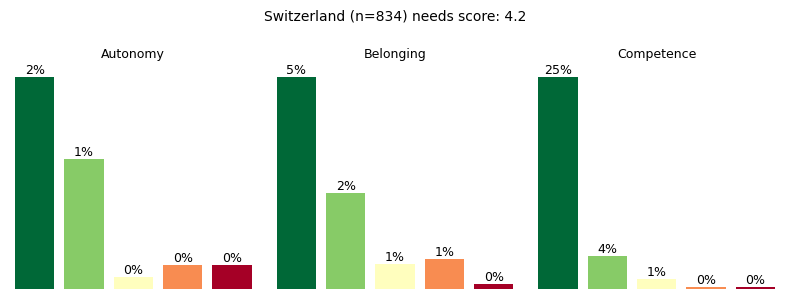

In [11]:
## Provides a figure with 3 bar graphs in one row showing the distribution of answers
## of answers to Motiro questions grouped by dimensions
## Dimensions with three vars: Autonomy, Belonging, Needs, Leadership.
## see cell above for the wellbeing dimension

## For testing purpose:
NS='SRC'
# Load the dataset
df = pd.read_csv(file_path, sep=",", encoding='utf-8')
#df.info()

## select which team, circle, category of respondent, etc. to display
team='Switzerland'
## select which variables (grouped in a "dimension") to display
dimension='needs'
#dimension='autonomy'
#dimension='belonging'
#dimension='competence'
#dimension='leadership'

# Filter the dataframe for 'Team Name'
#df = df[df['Team Name'] == team]
#df = df[df['region'] == team]
df = df[df['Country'] == team]
df.info()

#For circles (groups of teams), further filtering might be required:
df = df[df['Position'] == 'Volunteer']
#df = df[df['frontline'] == 'Frontline']
#df = df[df['region'] == 'Donetsk Region']

# Count the total number of respondents in filtered dataframe (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

# Define variable sets (dimensions)
health_vars = ['Strong','Drained','Frustrated']
engagement_vars = ['Meaning', 'Ideas', 'Values', 'Stay', 'Satisfied']
autonomy_vars = ['Myself','Tasks','Free']
belonging_vars = ['Group','Talk','Care'] #add: ,'Friendly','Team'?
competence_vars = ['Mastery','Competent']
needs_vars = ['Autonomy', 'Belonging', 'Competence']
leadership_vars = ['Listens', 'Understands', 'Encourages']
management_vars = ['Network', 'Learn','Responsibilities', 'Work','Appreciated','Impact']

all_vars = autonomy_vars + belonging_vars + competence_vars + management_vars + leadership_vars + needs_vars + health_vars + engagement_vars

dimension_vars = eval(f'{dimension}_vars')


# Compute team's scores for selected dimension
#mean_df = df.groupby('Team Name')[dimension_vars].mean().reset_index()
#mean_df = df.groupby('region')[dimension_vars].mean().reset_index()
mean_df = df.groupby('Country')[dimension_vars].mean().reset_index()

# Rescale health_vars to 1-5
#mean_df[health_vars] = mean_df[health_vars]*4+1

# Create a new column with the mean of the selected dimension
mean_df[f'{dimension}_score'] = mean_df[dimension_vars].mean(axis=1)
dimension_score = mean_df[f'{dimension}_score'].values.round(1)[0]

mean_df.info()

# Create a dictionary with the frequency of each answer for each 5 pt scale survey question
freq_dict5 = {'1': ['fully disagree'], '2': [], '3': [], '4': [], '5': ['fully agree']}


for var in dimension_vars:
    df[var] = df[var].replace(freq_dict5)
    freq_dict5[var] = [0] * 5
        
# Count the frequency of each answer for each survey question
for var in dimension_vars:
    freq_dict = df[var].value_counts().sort_index()
    freq_dict5[var] = freq_dict.tolist() + [0]*(5-len(freq_dict))
    freq_dict5[var] = freq_dict5[var][:5]


#create a dictionary so that the title of each plot is not the indicator but the survey question
title_dict = {'Strong': 'At my volunteer activity, I feel strong and vigorous.',
              'Drained': 'I feel emotionally drained from my volunteer activity.',
              'Frustrated': 'I feel frustrated by my volunteer activity.',              
              'Meaning': 'Meaning',
              'Ideas': 'Ideas',
              'Values': 'Values',
              'Stay': 'Stay',
              'Satisfied': 'Satisfied',
              'Myself': 'I feel like I can be myself \n at my volunteer activity.',
              'Tasks': 'The tasks I must do \n are in line with what I really want to do.',
              'Free': 'I am free to express my ideas \n and opinions on the volunteer activity.',
              'Group': 'At my volunteer activity, \n I feel part of a group.',
              'Talk': 'At my volunteer activity, I can talk \n about things that really matter to me.',
              'Care': 'People at my volunteer activity \n care about me.',
              'Mastery': 'I really master my tasks \n at my volunteer activity.',
              'Competent': 'I feel competent at my volunteer activity.',
              'Autonomy': 'Autonomy',
              'Belonging': 'Belonging',
              'Competence': 'Competence',
              'Listens': 'My supervisor listens to how \n I would like to do things.',
              'Understands': 'I feel understood \n by my supervisor.',
              'Encourages': 'My supervisor encourages me \n to ask questions.',
              'Network': 'Network',
              'Learn': 'Learn',
              'Responsibilities': 'Responsibilities',
              'Work': 'Work',
              'Appreciated': 'Appreciated',
              'Impact': 'Impact'
              }
# apply dictionary to replace answer in the title for the dimension
title_dict = {k: title_dict[k] for k in dimension_vars}

# Plot frequency bar charts
fig, axes = plt.subplots(math.ceil(len(dimension_vars)/3), 3, figsize=(8, 3))
plt.suptitle(f'{team} (n={n}) {dimension} score: {dimension_score}', fontsize=10)

# Remove all frames, axes, ticks before loop
for ax in axes.flatten():
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

# Define the colormap and reverse it
cmap = plt.get_cmap('RdYlGn_r')  # The '_r' suffix reverses the colormap
colors5 = [cmap(i / 4) for i in range(5)]

# Plot frequency bar charts
for i, var in enumerate(dimension_vars):
    # Reverse the data using slicing
    reversed_data = freq_dict5[var][::-1]
    plt.subplot(math.ceil(len(dimension_vars)/3), 3, i+1)
    plt.bar(range(1, 6), reversed_data, color=colors5)
    # Fix limits to x axis
    plt.xlim(0.5, 5.5)
    # Annotate with the percentage of each answer on top of each bar
    for j, freq in enumerate(reversed_data):
        plt.text(j + 1, freq, f'{freq/n:.0%}', ha='center', va='bottom', fontsize=9)
    plt.title(title_dict[var], fontsize=9)
plt.tight_layout()
plt.savefig(f'{NS}_{team}_{dimension}_bar.png', bbox_inches='tight', pad_inches=0.1)




<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, 86 to 10663
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         901 non-null    object 
 1   Survey Data       901 non-null    object 
 2   Well-being        901 non-null    float64
 3   Needs             901 non-null    float64
 4   Engagement        901 non-null    float64
 5   Autonomy          901 non-null    float64
 6   Belonging         901 non-null    float64
 7   Competence        901 non-null    float64
 8   Leadership        901 non-null    float64
 9   Management        901 non-null    float64
 10  Returns           901 non-null    float64
 11  Rewards           901 non-null    float64
 12  Status            901 non-null    float64
 13  Myself            901 non-null    int64  
 14  Tasks             901 non-null    int64  
 15  Free              901 non-null    int64  
 16  Mastery           901 non-null    int64  
 17 

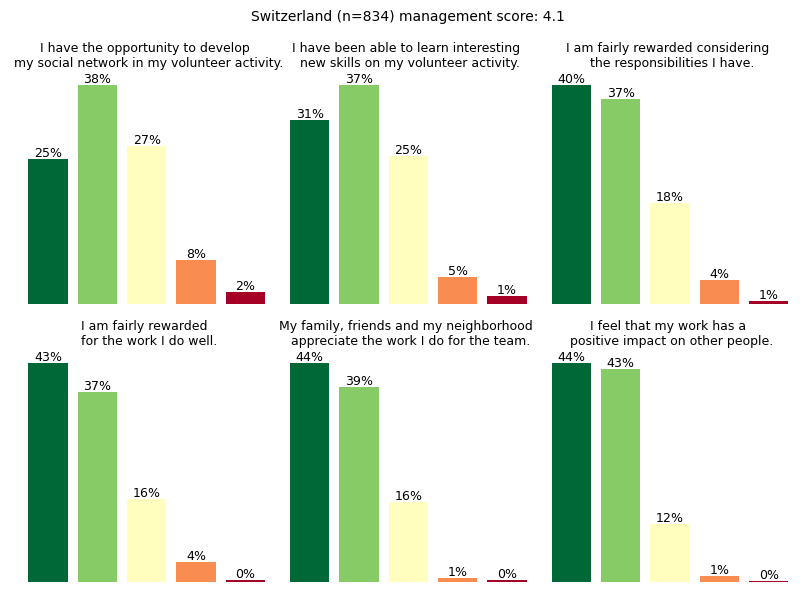

In [10]:
## Provides a figure with 5-6 bar graphs showing the distribution of answers
## of Motiro dashboard indicators grouped by dimensions
## Dimensions with 5 vars: engagement.
## Dimensions with 6 vars: management.
## see cell 2 for the wellbeing dimension
## see cell 3 for the needs, leadership, autonomy, belonging dimensions

## For testing purpose:
NS='SRC'
# Load the dataset
df = pd.read_csv(file_path, sep=",", encoding='utf-8')
#df.info()

## select which team, circle, category of respondent, etc. to display
team='Switzerland'
## select which variables (grouped in a "dimension") to display
#dimension='engagement'
dimension='management'

# Filter the dataframe for 'Team Name'
#df = df[df['Team Name'] == team]
#df = df[df['region'] == team]
df = df[df['Country'] == team]
df.info()

#For circles (groups of teams), further filtering might be required:
df = df[df['Position'] == 'Volunteer']
#df = df[df['frontline'] == 'Frontline']
#df = df[df['region'] == 'Donetsk Region']

# Count the total number of respondents in filtered dataframe (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

# Define variable sets (dimensions)
#health_vars = ['Strong','Drained','Frustrated']
engagement_vars = ['Stay', 'Meaning', 'Satisfied', 'Ideas', 'Values']
autonomy_vars = ['Myself','Tasks','Free']
belonging_vars = ['Group','Talk','Care'] #add: ,'Friendly','Team'?
competence_vars = ['Mastery','Competent']
needs_vars = ['Autonomy', 'Belonging', 'Competence']
leadership_vars = ['Listens', 'Understands', 'Encourages']
management_vars = ['Network', 'Learn','Responsibilities', 'Work','Appreciated','Impact']

all_vars = autonomy_vars + belonging_vars + competence_vars + management_vars + leadership_vars + needs_vars + health_vars + engagement_vars

dimension_vars = eval(f'{dimension}_vars')


# Compute team's scores for selected dimension
#mean_df = df.groupby('Team Name')[dimension_vars].mean().reset_index()
#mean_df = df.groupby('region')[dimension_vars].mean().reset_index()
mean_df = df.groupby('Country')[dimension_vars].mean().reset_index()

# Create a new column with the mean of the selected dimension
mean_df[f'{dimension}_score'] = mean_df[dimension_vars].mean(axis=1)
dimension_score = mean_df[f'{dimension}_score'].values.round(1)[0]

mean_df.info()

# Create a dictionary with the frequency of each answer for each 5 pt scale survey question
freq_dict5 = {'1': ['fully disagree'], '2': [], '3': [], '4': [], '5': ['fully agree']}


for var in dimension_vars:
    df[var] = df[var].replace(freq_dict5)
    freq_dict5[var] = [0] * 5
        
# Count the frequency of each answer for each survey question
for var in dimension_vars:
    freq_dict = df[var].value_counts().sort_index()
    freq_dict5[var] = freq_dict.tolist() + [0]*(5-len(freq_dict))
    freq_dict5[var] = freq_dict5[var][:5]


#create a dictionary so that the title of each plot is not the indicator but the survey question
title_dict = {'Strong': 'At my volunteer activity, I feel strong and vigorous.',
              'Drained': 'I feel emotionally drained from my volunteer activity.',
              'Frustrated': 'I feel frustrated by my volunteer activity.',              
              'Meaning': 'The team has a great deal \n of personal meaning for me.',
              'Ideas': 'I share my ideas \n to improve the team.',
              'Values': 'The things that I value in life are very similar \n to the things that the team values.',
              'Stay': 'If I could choose, I will \n be volunteering one year from now.',
              'Satisfied': 'Considering everything, I am satisfied \n with my volunteer activity.',
              'Myself': 'I feel like I can be myself \n at my volunteer activity.',
              'Tasks': 'The tasks I must do \n are in line with what I really want to do.',
              'Free': 'I am free to express my ideas \n and opinions on the volunteer activity.',
              'Group': 'At my volunteer activity, \n I feel part of a group.',
              'Talk': 'At my volunteer activity, I can talk \n about things that really matter to me.',
              'Care': 'People at my volunteer activity \n care about me.',
              'Mastery': 'I really master my tasks \n at my volunteer activity.',
              'Competent': 'I feel competent at my volunteer activity.',
              'Listens': 'My supervisor listens to how \n I would like to do things.',
              'Understands': 'I feel understood \n by my supervisor.',
              'Encourages': 'My supervisor encourages me \n to ask questions.',
              'Network': 'I have the opportunity to develop \n my social network in my volunteer activity.',
              'Learn': 'I have been able to learn interesting \n new skills on my volunteer activity.',
              'Responsibilities': 'I am fairly rewarded considering \n the responsibilities I have.',
              'Work': 'I am fairly rewarded \n for the work I do well.',
              'Appreciated': 'My family, friends and my neighborhood \n appreciate the work I do for the team.',
              'Impact': 'I feel that my work has a \n positive impact on other people.'
              }
# apply dictionary to replace answer in the title for the dimension
title_dict = {k: title_dict[k] for k in dimension_vars}

# Plot frequency bar charts
fig, axes = plt.subplots(math.ceil(len(dimension_vars)/3), 3, figsize=(8, 6))
plt.suptitle(f'{team} (n={n}) {dimension} score: {dimension_score}', fontsize=10)

# Remove all frames, axes, ticks before loop
for ax in axes.flatten():
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

# Define the colormap and reverse it
cmap = plt.get_cmap('RdYlGn_r')  # The '_r' suffix reverses the colormap
colors5 = [cmap(i / 4) for i in range(5)]

# Plot frequency bar charts
for i, var in enumerate(dimension_vars):
    # Reverse the data using slicing
    reversed_data = freq_dict5[var][::-1]
    plt.subplot(math.ceil(len(dimension_vars)/3), 3, i+1)
    plt.bar(range(1, 6), reversed_data, color=colors5)
    # Fix limits to x axis
    plt.xlim(0.5, 5.5)
    # Annotate with the percentage of each answer on top of each bar
    for j, freq in enumerate(reversed_data):
        plt.text(j + 1, freq, f'{freq/n:.0%}', ha='center', va='bottom', fontsize=9)
    plt.title(title_dict[var], fontsize=9)
plt.tight_layout()
plt.savefig(f'{NS}_{team}_{dimension}_bar.png', bbox_inches='tight', pad_inches=0.1)


